In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [26]:
# Veri setinin yolunu belirleme
base_dir = "/kaggle/input/horses-or-humans-dataset/horse-or-human/"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

In [27]:
# Resimleri okuma ve işleme fonksiyonu
def load_and_process_images(directory):
    files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith(('.png', '.jpg', '.jpeg'))]
    images = [cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB) for file in files]
    return images

In [28]:
# Eğitim ve doğrulama verilerini yükleme
horse_train_images = load_and_process_images(os.path.join(train_dir, "horses"))
human_train_images = load_and_process_images(os.path.join(train_dir, "humans"))
horse_validation_images = load_and_process_images(os.path.join(validation_dir, "horses"))
human_validation_images = load_and_process_images(os.path.join(validation_dir, "humans"))

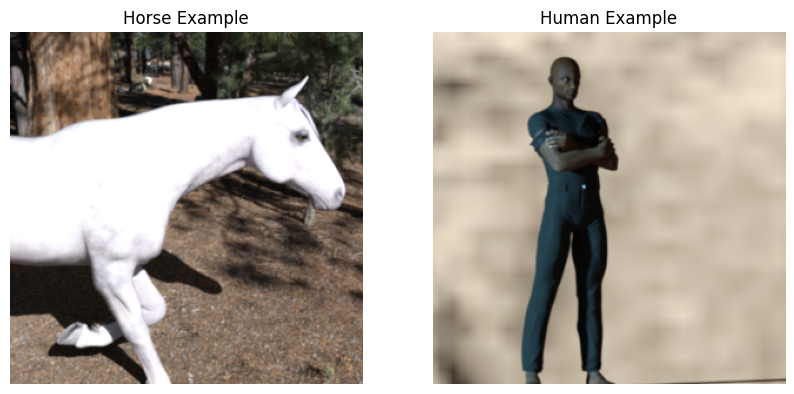

In [29]:
# Örnek resimlerin gösterilmesi
def show_example_images(horse_image, human_image):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(horse_image)
    plt.title('Horse Example')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(human_image)
    plt.title('Human Example')
    plt.axis('off')
    plt.show()

show_example_images(horse_train_images[0], human_train_images[0])

In [30]:
# Resimlerin yeniden boyutlandırılması
img_size = (256, 256)

def resize_images(image_list):
    return [cv2.resize(image, img_size) for image in image_list]

horse_images_resized = resize_images(horse_train_images)
human_images_resized = resize_images(human_train_images)

In [34]:
# Resimlerin ve etiketlerin numpy dizilerine dönüştürülmesi
horse_labels = np.ones(len(horse_images_resized))
human_labels = np.zeros(len(human_images_resized))

all_images = np.concatenate([horse_images_resized, human_images_resized])
all_labels = np.concatenate([horse_labels, human_labels])

In [35]:
# Verilerin eğitim ve doğrulama olarak bölünmesi
X_train, X_valid, y_train, y_valid = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

In [36]:
# Verilerin normalizasyonu
X_train = X_train / 255.0
X_valid = X_valid / 255.0

In [37]:
# Veri boyutlarının kontrolü
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_train shape:", y_train.shape)
print("y_valid shape:", y_valid.shape)

X_train shape: (821, 256, 256, 3)
X_valid shape: (206, 256, 256, 3)
y_train shape: (821,)
y_valid shape: (206,)


In [43]:
# Modelin oluşturulması
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Modelin derlenmesi
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
# Modeli eğitmek için veri setini hazırlama

# Eğitim veri seti ve doğrulama veri seti modelin fit fonksiyonuna verilir
history = model.fit(
    X_train, y_train,
    epochs=7,  # Eğitim döngüsü sayısı
    batch_size=32,  # Her bir döngüdeki örnek sayısı
    validation_data=(X_valid, y_valid),  # Doğrulama veri seti
    verbose=1  # Eğitim sırasında çıktı detay düzeyi
)

26/26 [==============================] - 64s 2s/step - loss: 1.4176e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000


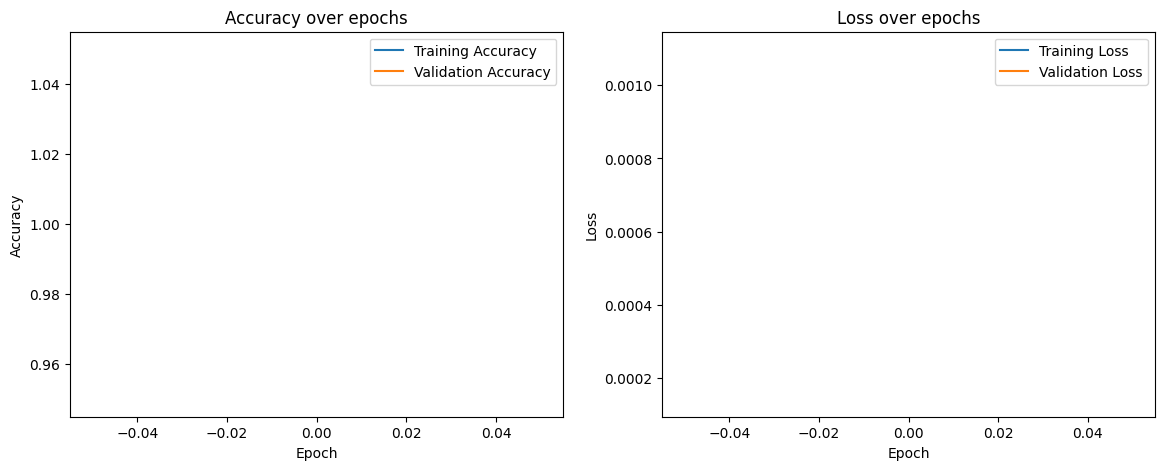

In [48]:
# Eğitim sonuçlarını değerlendirme ve görselleştirme
plt.figure(figsize=(14, 5))

# Eğitim ve doğrulama doğruluğunun görselleştirilmesi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Eğitim ve doğrulama kaybının görselleştirilmesi
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [49]:
# Model performansını değerlendirme
test_loss, test_accuracy = model.evaluate(X_valid, y_valid, verbose=2)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

7/7 - 4s - loss: 0.0011 - accuracy: 1.0000 - 4s/epoch - 611ms/step
Test Loss: 0.0010987423593178391
Test Accuracy: 1.0


In [55]:
# Yüklediğiniz fotoğrafın yolu
image_path = '/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/humans/valhuman01-04.png'

# Fotoğrafı yükleme ve işleme fonksiyonu
def load_and_prepare_image(image_path, img_size):
    # Fotoğrafı yükle
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Fotoğrafı yeniden boyutlandırma
    img = cv2.resize(img, img_size)
    
    # Fotoğrafı bir numpy dizisine dönüştür ve renk değerlerini [0, 1] aralığına ölçekleme
    img = img / 255.0
    
    # Fotoğrafı modelin beklediği batch boyutuna getirme
    img = np.expand_dims(img, axis=0)
    return img

# Fotoğrafı hazırlama
prepared_image = load_and_prepare_image(image_path, (256, 256))

# Modeli kullanarak tahmin yapma
prediction = model.predict(prepared_image)

# Tahmin sonucunu yorumlama
predicted_class = "Horse" if prediction[0][0] > 0.5 else "Human"
predicted_class

1/1 [==============================] - 0s 50ms/step


'Human'